# Exploratory Data Analysis - NASA Turbofan Engine Degradation

This notebook performs a comprehensive EDA on the NASA Turbofan Engine Degradation Simulation dataset. 

**Objectives:**
1. Download and load the dataset.
2. Inspect data structure and statistics.
3. Analyze missing values and distributions.
4. Visualize sensor readings and correlations.
5. Detect outliers.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io
import os

# Set plot style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
pd.set_option("display.max_columns", None)

# Output directory for plots
os.makedirs("../outputs/eda", exist_ok=True)

## 1. Data Download and Loading
We will download the CMAPSS dataset from the NASA repository if it doesn't already exist.

In [5]:
DATA_DIR = "../data/raw"
os.makedirs(DATA_DIR, exist_ok=True)

def download_data(output_dir):
    if os.path.exists(os.path.join(output_dir, "train_FD001.txt")):
        print("Data already exists. Skipping download.")
        return
    
    print("Downloading data via git clone...")
    # Clone into a temp directory
    temp_dir = "temp_cmapss_repo"
    repo_url = "https://github.com/shining0611armor/Predicting-of-Turbofan-Engine-Degradation-Using-the-NASA-C-MAPSS-Dataset.git"
        
    # Use system commands for git
    if os.path.exists(temp_dir):
        import shutil
        shutil.rmtree(temp_dir)
            
    os.system(f"git clone {repo_url} {temp_dir}")
        
    # Move the zip file
    zip_path = os.path.join(temp_dir, "CMAPSSData.zip")
    if os.path.exists(zip_path):
        with zipfile.ZipFile(zip_path, "r") as z:
            z.extractall(output_dir)
        print("Download and extraction complete.")
    else:
        print("Error: CMAPSSData.zip not found in cloned repo.")
            
    # Cleanup
    import shutil
    if os.path.exists(temp_dir):
        shutil.rmtree(temp_dir)

    download_data(DATA_DIR)

In [6]:
# Load train_FD001.txt
# Columns: unit_number, time_in_cycles, setting_1, setting_2, setting_3, s_1 ... s_21
col_names = ['unit_number', 'time_in_cycles', 'setting_1', 'setting_2', 'setting_3'] + [f's_{i}' for i in range(1, 22)]
df = pd.read_csv(os.path.join(DATA_DIR, "train_FD001.txt"), sep="\s+", header=None, names=col_names)

print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (20631, 26)


,unit_number,time_in_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## 2. Basic Inspection
check data types and statistical summary.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   setting_1       20631 non-null  float64
 3   setting_2       20631 non-null  float64
 4   setting_3       20631 non-null  float64
 5   s_1             20631 non-null  float64
 6   s_2             20631 non-null  float64
 7   s_3             20631 non-null  float64
 8   s_4             20631 non-null  float64
 9   s_5             20631 non-null  float64
 10  s_6             20631 non-null  float64
 11  s_7             20631 non-null  float64
 12  s_8             20631 non-null  float64
 13  s_9             20631 non-null  float64
 14  s_10            20631 non-null  float64
 15  s_11            20631 non-null  float64
 16  s_12            20631 non-null  float64
 17  s_13            20631 non-null 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
time_in_cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,5.329200e-15,14.6200,14.6200,14.6200,14.6200,14.6200


## 3. Missing Value Analysis
Check for any null values in the dataset.

Missing Values per column:
Series([], dtype: int64)


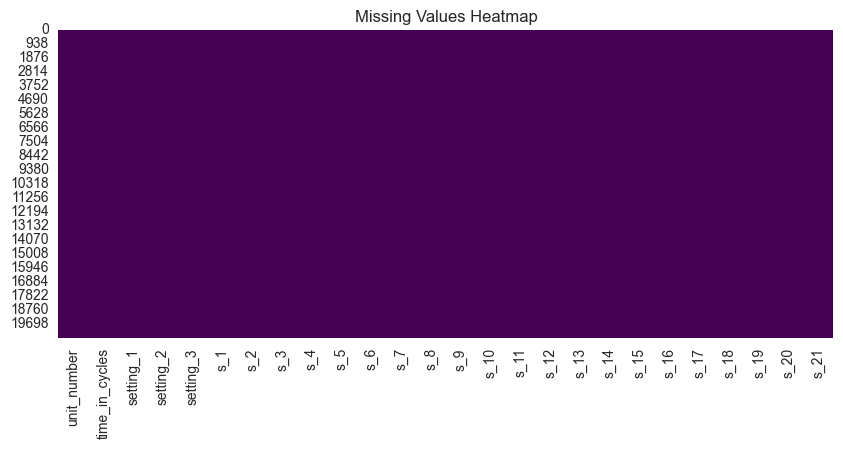

In [9]:
missing_values = df.isnull().sum()
print("Missing Values per column:")
print(missing_values[missing_values > 0])

plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.savefig('../outputs/eda/missing_values_heatmap.png')
plt.show()

## 4. Target Variable Analysis (RUL)
In this dataset, the target is the Remaining Useful Life (RUL). For the training set, we assume the engine runs until failure. 
RUL = Max Cycle - Current Cycle

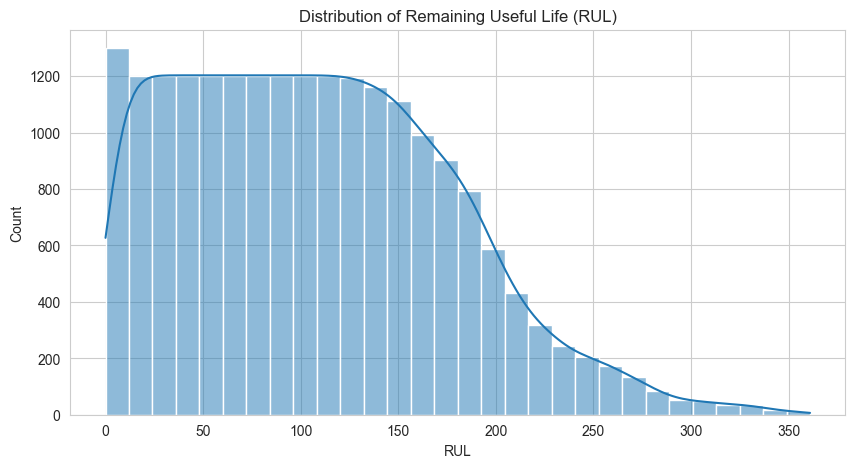

In [10]:
def calculate_rul(df):
    # Get max cycle for each unit
    max_cycles = df.groupby('unit_number')['time_in_cycles'].max().reset_index()
    max_cycles.columns = ['unit_number', 'max_cycles']
    
    # Merge back
    df = df.merge(max_cycles, on='unit_number', how='left')
    
    # Calculate RUL
    df['RUL'] = df['max_cycles'] - df['time_in_cycles']
    
    # Drop max_cycles helper column
    df.drop('max_cycles', axis=1, inplace=True)
    return df

df = calculate_rul(df)

plt.figure(figsize=(10, 5))
sns.histplot(df['RUL'], kde=True, bins=30)
plt.title('Distribution of Remaining Useful Life (RUL)')
plt.xlabel('RUL')
plt.savefig('../outputs/eda/rul_distribution.png')
plt.show()

## 5. Sensor Reading Distributions
Analyze the distribution of sensor values to identify constant sensors or skewed distributions.

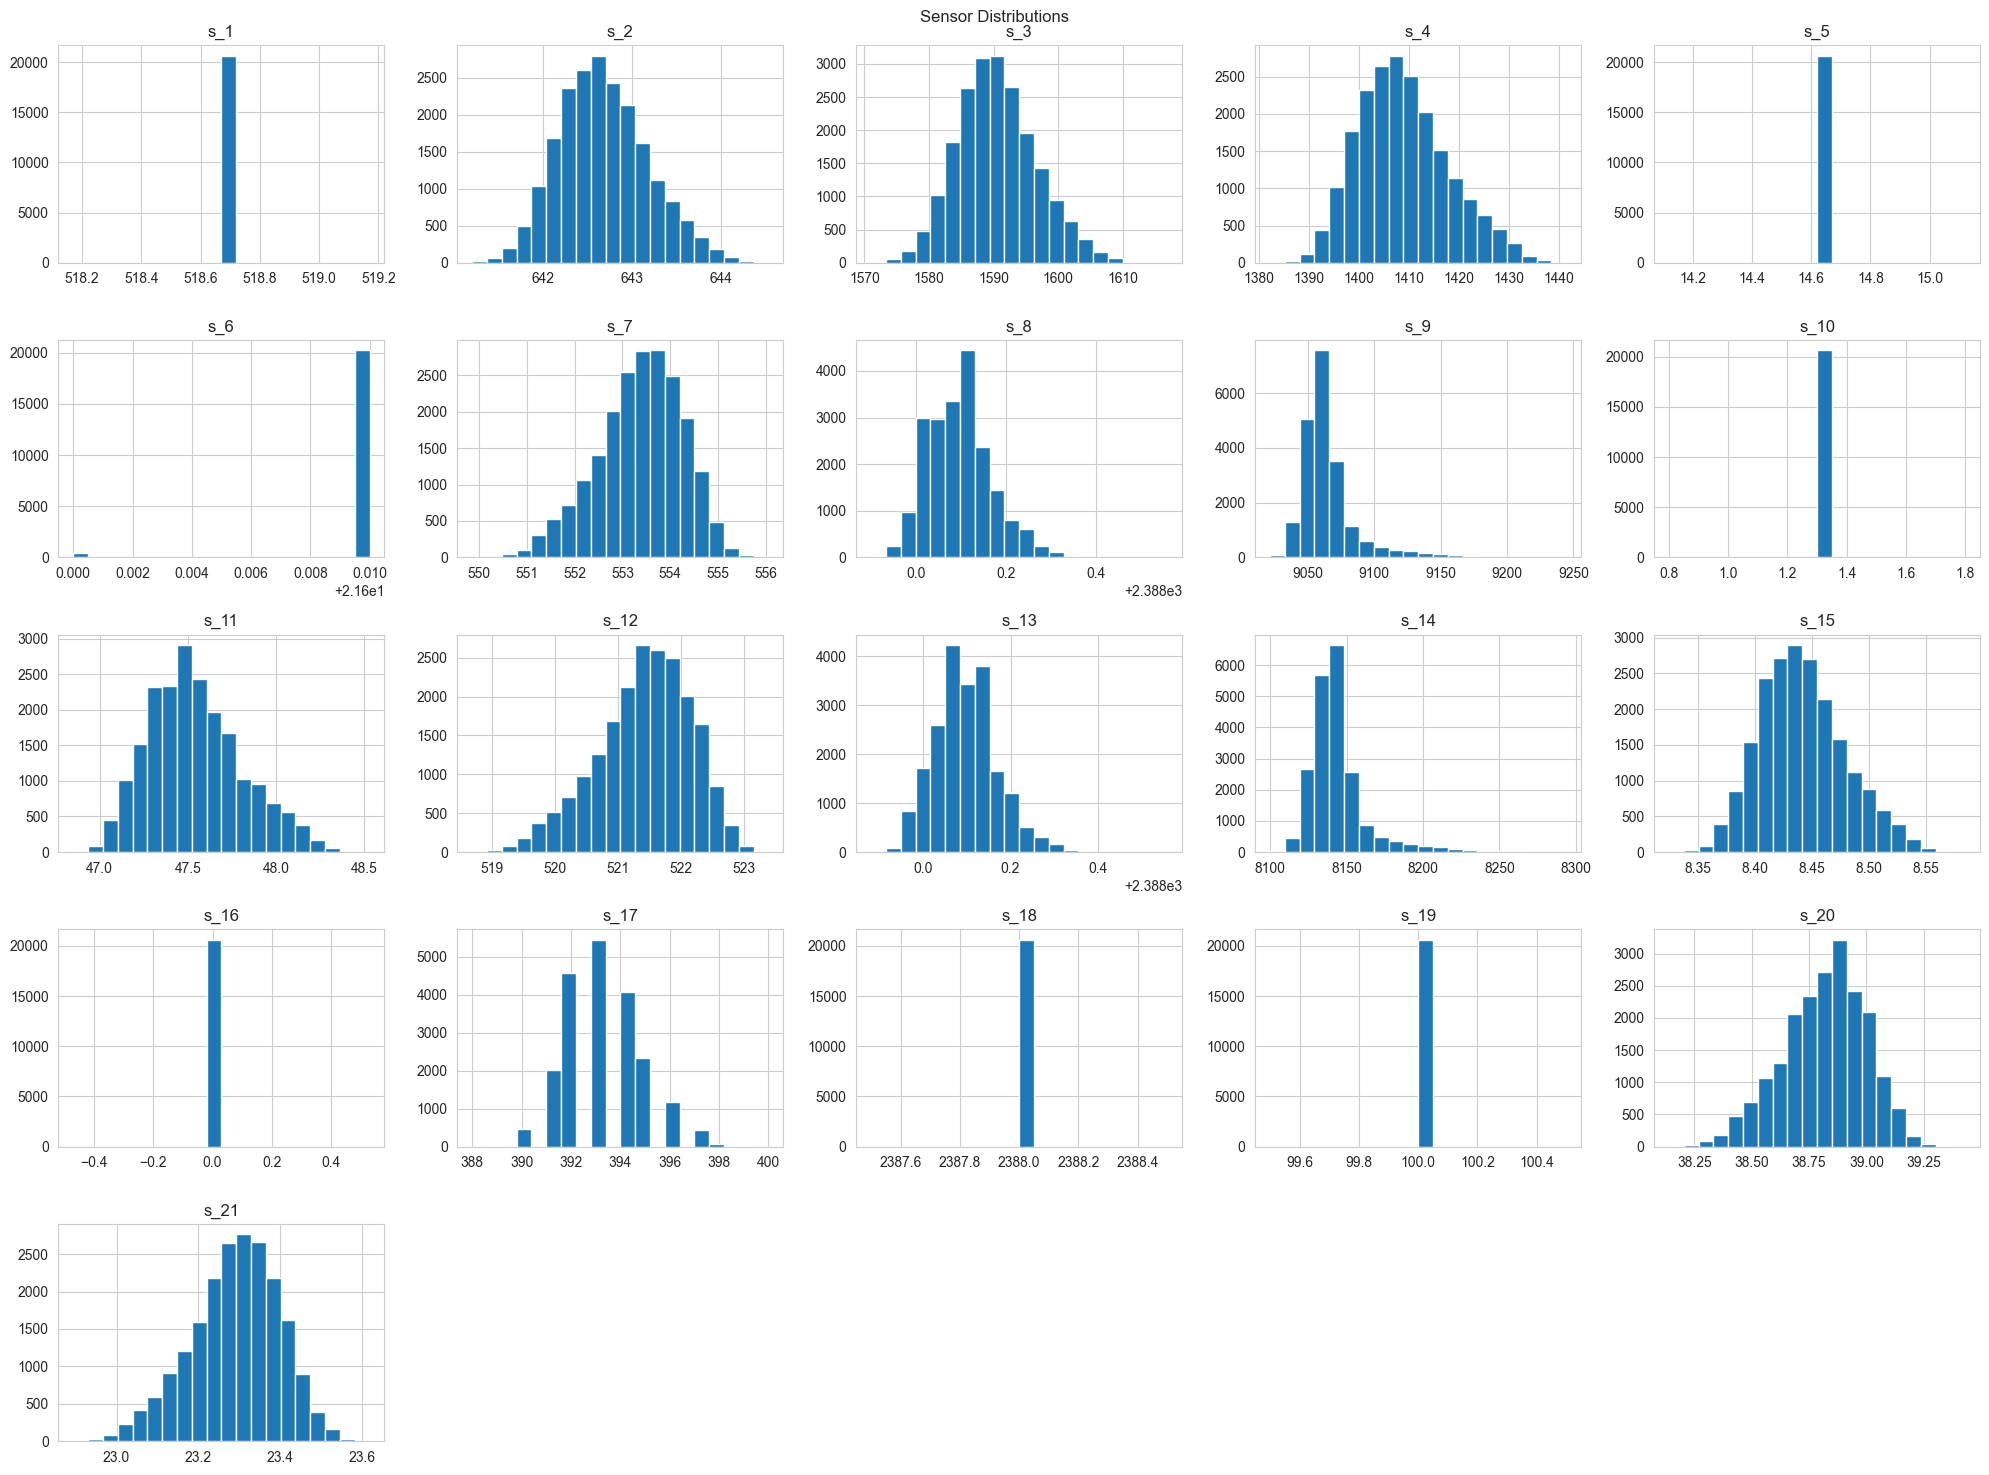

In [11]:
sensor_cols = [c for c in df.columns if 's_' in c]

# Plot histograms for all sensors
df[sensor_cols].hist(bins=20, figsize=(20, 15))
plt.suptitle('Sensor Distributions')
plt.tight_layout()
plt.savefig('../outputs/eda/sensor_histograms.png')
plt.show()

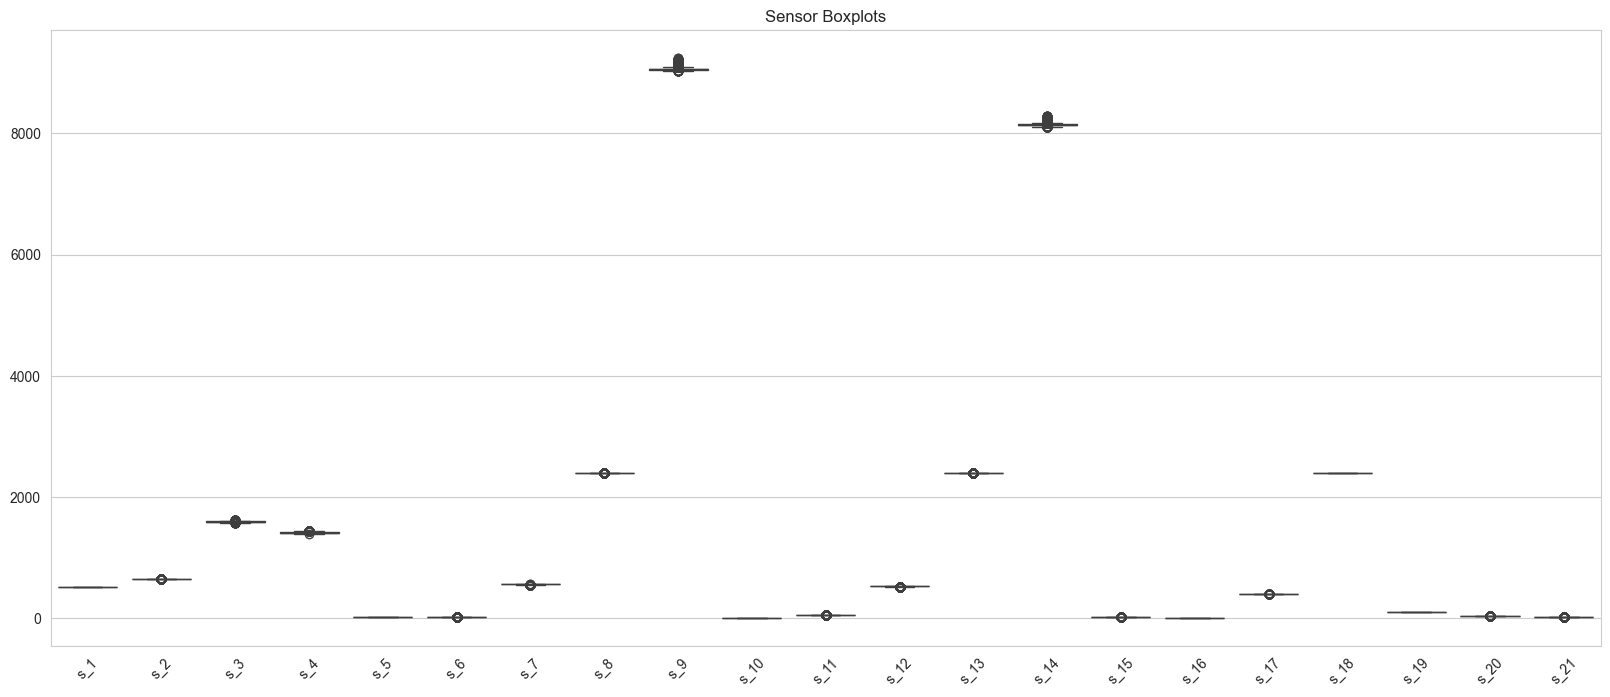

In [12]:
# Box plots to see ranges and outliers
plt.figure(figsize=(20, 8))
sns.boxplot(data=df[sensor_cols])
plt.xticks(rotation=45)
plt.title('Sensor Boxplots')
plt.savefig('../outputs/eda/sensor_boxplots.png')
plt.show()

## 6. Correlation Analysis
Check how sensors correlate with each other and with RUL.

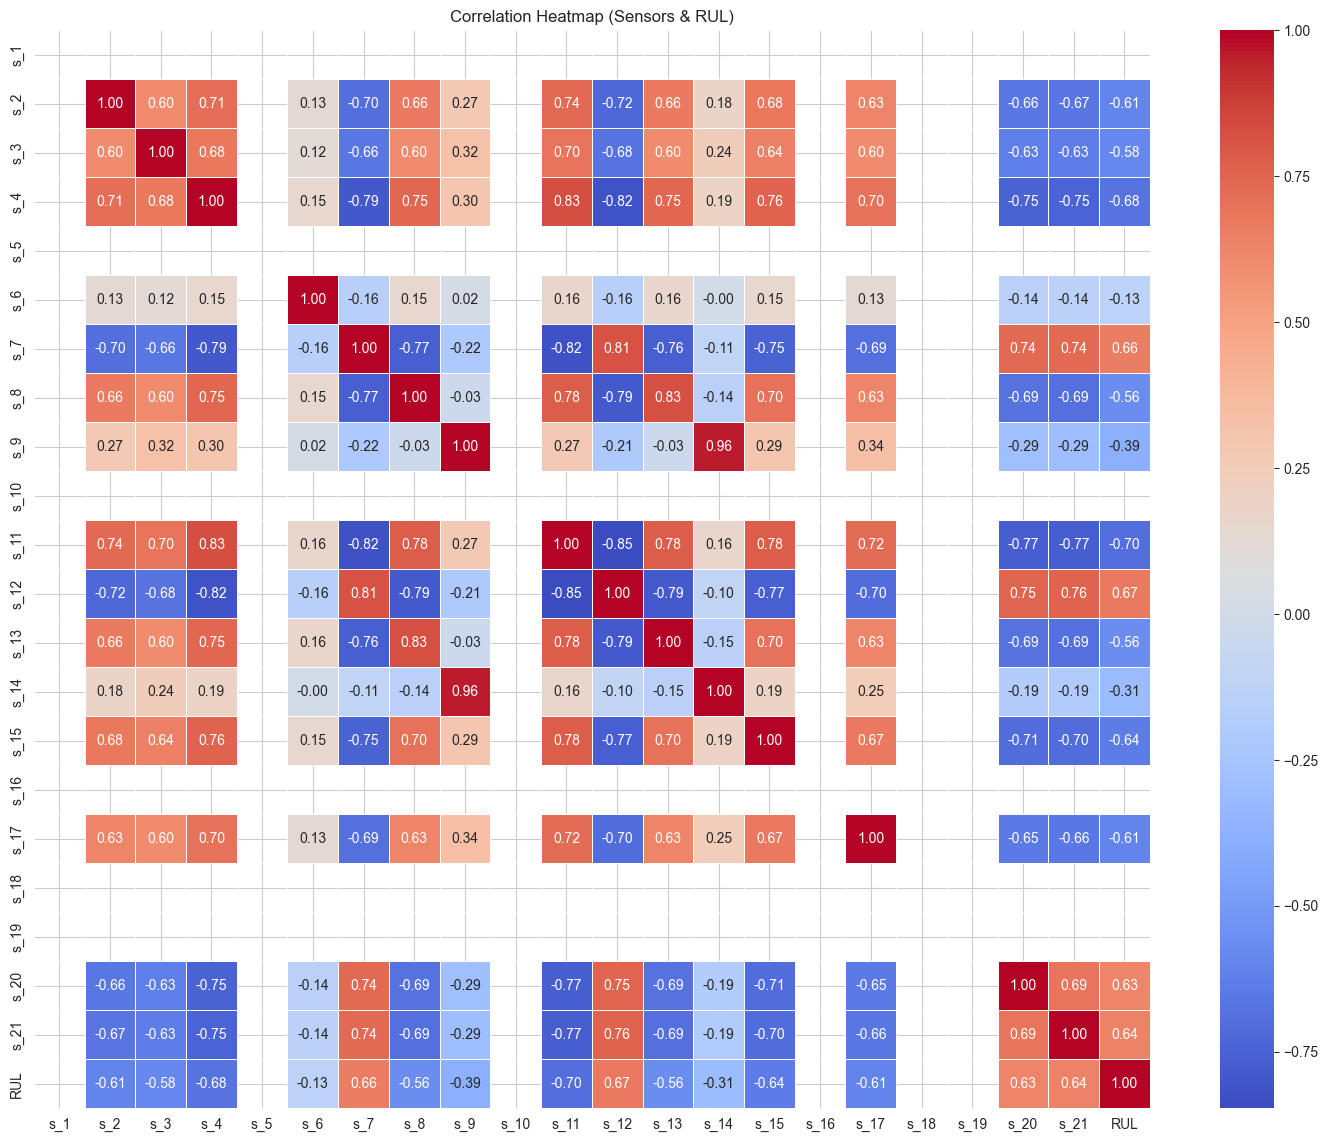

In [13]:
corr = df[sensor_cols + ['RUL']].corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Sensors & RUL)')
plt.savefig('../outputs/eda/correlation_heatmap.png')
plt.show()

### Constant Sensors
Some sensors might have constant values (std deviation = 0). These provide no information.

In [14]:
std_devs = df[sensor_cols].std()
constant_sensors = std_devs[std_devs == 0].index.tolist()
print(f"Constant Average Sensors: {constant_sensors}")

Constant Average Sensors: ['s_1', 's_10', 's_18', 's_19']


## 7. Time Series Analysis
Visualize how sensors change over time for a sample unit (e.g., Unit 1) until failure.

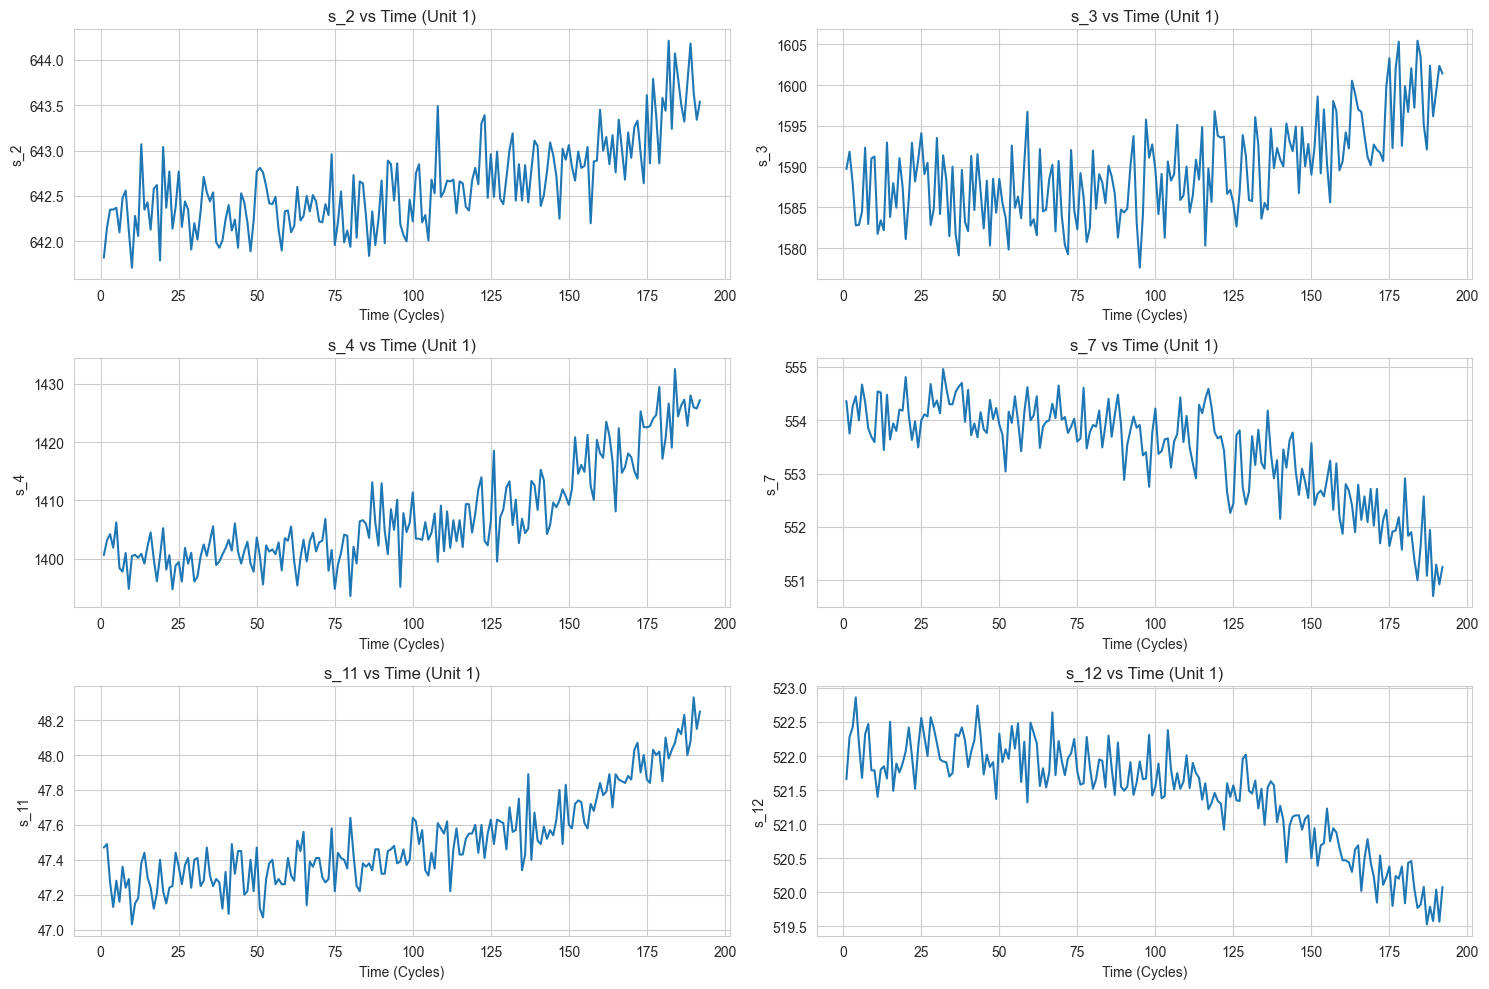

In [15]:
unit_id = 1
unit_data = df[df['unit_number'] == unit_id]

# Select a few key sensors that showed correlation with RUL
# Based on typical analysis of this dataset: s_2, s_3, s_4, s_7, s_11, s_12 are often useful
key_sensors = ['s_2', 's_3', 's_4', 's_7', 's_11', 's_12']

plt.figure(figsize=(15, 10))
for i, sensor in enumerate(key_sensors):
    plt.subplot(3, 2, i+1)
    plt.plot(unit_data['time_in_cycles'], unit_data[sensor])
    plt.title(f'{sensor} vs Time (Unit {unit_id})')
    plt.xlabel('Time (Cycles)')
    plt.ylabel(sensor)

plt.tight_layout()
plt.savefig('../outputs/eda/time_series_example.png')
plt.show()

## 8. Outlier Detection
Using Z-Score to identify outliers in sensor data.

In [16]:
from scipy import stats

# Drop constant sensors before calculating Z-scores to avoid division by zero
cols_to_check = [c for c in sensor_cols if c not in constant_sensors]

z_scores = np.abs(stats.zscore(df[cols_to_check]))
outliers = (z_scores > 3)

print(f"Total data points: {df.shape[0] * len(cols_to_check)}")
print(f"Total outliers detected (Z > 3): {outliers.sum().sum()}")
print(f"Percentage of outliers: {100 * outliers.sum().sum() / (df.shape[0] * len(cols_to_check)):.2f}%")

Total data points: 350727
Total outliers detected (Z > 3): 2009
Percentage of outliers: 0.57%


/var/folders/2t/h2swbhr56cddcdhwxy8t_k740000gn/T/ipykernel_22018/4177130916.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(df[cols_to_check]))


## Summary
Key findings from the EDA:
1. **Dataset Structure**: The dataset contains time-series data for multiple engine units.
2. **Missing Values**: Checked for missing values (usually none in this clean dataset).
3. **RUL**: Calculated Remaining Useful Life, which serves as our regression target.
4. **Sensor Correlations**: Identified sensors that strongly correlate with RUL (likely good features).
5. **Constant Sensors**: Identified sensors with zero variance that should be dropped in feature engineering.
6. **Time Series**: Visualized degradation trends in key sensors.